# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable.
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or
<a href="http://www.google.com">Google</a><br>

# Phase II Revisions


Use the following cell (or more if you need them) to make any needed revisions or additions to your Phase II data cleaning. If you were not recommended to make any changes, and don't have any new data sources for Phase III, you may skip this part.


In [ ]:
import csv
import pandas as pd
def data_cleaning():

### imr ###

    reader_list = []
    with open("imr.csv", encoding = "utf8") as csvfile:
        reader = csv.reader(csvfile)
        reader_list = list(reader)

    header = ["Country"] + reader_list[8][39:64]
    reader_list = reader_list[9:]
    finalreg = []
    finalcon = []

    for i in reader_list:
        fornowcon = []
        fornowreg = []
        if len(i) != 0:
            country = i[0]
            if "income" in country and "(" not in country and "&" not in country:
              fornowreg += [country]
              for x in i[39:64]:
                if x != "":
                    fornowreg += [float(x)]
                if len(fornowreg) == 26:
                    finalreg+=[fornowreg]
            else:
              fornowcon += [country]
              for x in i[39:64]:
                if x != "":
                    fornowcon += [float(x)]
                if len(fornowcon) == 26:
                    finalcon +=[fornowcon]

    final_pdreg = pd.DataFrame(data = finalreg, columns = header)
    #final_pdreg.set_index("Country", inplace = True)
    #final_pdreg.loc["Mean by Year", :] = final_pdreg.mean(axis = 0)
    final_pdreg["Mean by Country"] = final_pdreg.mean(axis = 1)
    final_pdcon = pd.DataFrame(data = finalcon, columns = header)
    #final_pdcon.set_index("Country", inplace = True)
    #final_pdcon.loc["Mean by Year", :] = final_pdcon.mean(axis = 0)
    final_pdcon["Mean by Country"] = final_pdcon.mean(axis = 1)
    final_pd = pd.concat([final_pdreg, final_pdcon])
    final_pd.to_csv("imrdata.csv")
    print( final_pd )
### Water ###
    reader_list = []
    with open("NumberofDeathsbyWater.csv", encoding = "utf8") as csvfile:
      reader = csv.reader(csvfile)
      reader_list = list(reader)

    header = reader_list[0]
    reader_list = reader_list[1:]

    final = []
    for i in reader_list:
      country = i[0]
      deaths = round(float(i[3]),2)
      if i[2] == "2017":
          final += [[country, deaths]]
    final_pd = pd.DataFrame(data = final, columns = ["Country", "Deaths"])
    final_pd.to_csv("waterdata.csv")
    print( final_pd)

  ### pollution ###

    pollutiondata = pd.read_csv("pollutiondata.csv", delimiter = ",")
    pollutiondata.rename(columns = {"Country Name": "Country", "Value": "Pollution"}, inplace = True)
    pollutiondata.to_csv("pollutiondata.csv")
    print(pollutiondata)





############ Function Call ############
data_cleaning()

                 Country        1995  ...       2019  Mean by Country
0            High income    8.400000  ...   4.300000         5.820000
1             Low income  100.900000  ...  47.900000        71.356000
2    Lower middle income   77.500000  ...  36.600000        55.216000
3          Middle income   60.691912  ...  26.852219        42.011005
4    Upper middle income   37.000000  ...  11.300000        21.852000
..                   ...         ...  ...        ...              ...
231                Samoa   21.100000  ...  12.900000        16.332000
232          Yemen, Rep.   79.300000  ...  43.600000        54.912000
233         South Africa   43.800000  ...  27.500000        38.764000
234               Zambia  101.400000  ...  42.400000        65.964000
235             Zimbabwe   55.500000  ...  38.400000        50.048000

[241 rows x 27 columns]
                        Country      Deaths
0                   Afghanistan     5256.65
1                       Albania        4.09
2  

# Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1.

2.

3.

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source:
*   Web Collection #1 Source:
*   Web Collection #2 Source:



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function.

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit.

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseIII.ipynb and your Python GUI file.

## Insights

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
def insight1():
  data = pd.read_csv("imrdata.csv", delimiter = ",", index_col = 0)
  databyincome = data.iloc[0:5]
  databyincome.sort_values(by = "Mean by Country", ascending = False, inplace = True)
  high = (list(databyincome["Country"])[0])
  low = (list(databyincome["Country"])[-1])
  print("Income level with highest imr: " + high + "; Income level with the lowest imr: " + low)


############ Function Call ############
insight1()

Income level with highest imr: Low income; Income level with the lowest imr: High income


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Insight 1 Explanation

When analyzing highs and lows of mean IMR over the years under the basis of income per country, it opens our analysis up to the idea that, on average, IMR varies based on quality of living. Income is the most direct measure of quality of life and our analysis proves that countries with low income levels have high mean IMR and high income levels have low IMR.

In [ ]:
import numpy as np
def insight2():
  nddata = pd.read_csv("nddata.csv", delimiter = ",", index_col= 0)
  imrdata = pd.read_csv("imrdata.csv", delimiter = ",", index_col= 0)
  waterdata = pd.read_csv("waterdata.csv", delimiter = ",")
  pollutiondata = pd.read_csv("pollutiondata.csv", delimiter = ",")
  combined = pd.concat([imrdata, nddata, waterdata, pollutiondata])
  combined = combined.groupby("Country").aggregate({"Male%":"sum", "Female%" : "sum", "Deaths" : "sum", "Mean by Country": "sum", "Pollution": "sum"})
  combined  = combined.rename(columns = {"Mean by Country": "Mean IMR"})
  combined = combined.replace(0, np.NaN)
  combined = combined.dropna()
  combined.to_csv("agg_all.csv")
  alldata = pd.read_csv("agg_all.csv", delimiter = ",")
  ndpercent = round(((alldata["Country"][(alldata["Male%"] > 15)&(alldata["Female%"] > 15)]).size / alldata["Country"].size ) * 100, 2)
  pollutionpercent = round(((alldata["Country"][alldata["Pollution"] >= 100]).size / alldata["Country"].size)*100,2)
  waterpercent = round(((alldata["Country"][alldata["Deaths"] > 3000]).size / alldata["Country"].size)*100,2)
  imrpercent = round(((alldata["Country"][alldata["Mean IMR"] > 50]).size / alldata["Country"].size)*100, 2)
  print("Percent over water threshold: " + str(waterpercent) + "% \nPercent over nurtional deficiency threshold: " + str(ndpercent) + "% \nPercent over pollution threshold: " + str(pollutionpercent) + "% \nPercent over IMR threshold: " + str(imrpercent) + "%")







############ Function Call ############
insight2()

Percent over water threshold: 33.62% 
Percent over nurtional deficiency threshold: 27.59% 
Percent over pollution threshold: 79.31% 
Percent over IMR threshold: 33.62%


### Insight 2 Explanation

As per the thresholds identified through research, 3000 deaths for water deaths, 100 deaths for nutritional deficiency, 15% for pollution and IMR of 50, are considered for a country to be at the top percentiles of risk. Through our data we identified that around 33.62%, 27.59%, 79.31%, 33.62%  of countries were over their thresholds respectively. This shows that in regards to water related deaths, nutritional deficiency, and IMR there is a chance that around 30% of countries are at top percentiles of risk, while for pollution around 80% of countries are at the top percentiles at risk.

In [ ]:
def insight3():
  nddata = pd.read_csv("nddata.csv", delimiter = ",")
  pollutiondata = pd.read_csv("pollutiondata.csv", delimiter = ",")
  waterdata = pd.read_csv("waterdata.csv", delimiter = ",")
  new = pd.concat([nddata, pollutiondata, waterdata])
  #new = new.fillna(0)
  new = new.drop(["Year"], axis=1)
  new = new.groupby("Country").aggregate({"Male%":"sum", "Female%" : "sum", "Pollution" : "sum", "Deaths" : "sum" })
  new = new.replace(0, np.NaN)
  new = new.dropna()
  new["Deaths"] =  new["Deaths"] / 1000
  new.to_csv("agg_factors.csv")
  return new





############ Function Call ############
insight3()

,Male%,Female%,Pollution,Deaths
Country,,,,
Afghanistan,32.7,33.0,100.000000,5.25665
Albania,6.6,6.0,100.000000,0.00409
Algeria,3.1,3.0,100.000000,0.18994
Angola,16.6,14.6,100.000000,14.65692
Argentina,2.4,2.2,98.322282,0.26714
...,...,...,...,...
Uzbekistan,4.6,4.3,100.000000,0.10505
Vanuatu,14.1,9.0,42.917931,0.02806
Vietnam,11.8,12.1,100.000000,1.57662


### Insight 3 Explanation
In this insight, we can identify that water deaths and nutritional deficiencies are factors that signify quality of life, but pollution is not. However, pollution could possibly be a factor that affects IMR as certain developed countries can have low IMR, low water deaths, and low nutritional deficiency but high pollution.

In [ ]:
def insight4():
  alldata = pd.read_csv("agg_all.csv", delimiter = ",", index_col= 0)
  return(alldata)



############ Function Call ############
insight4()

,Male%,Female%,Deaths,Mean IMR,Pollution
Country,,,,,
Afghanistan,32.7,33.0,5256.65,72.800,100.000000
Albania,6.6,6.0,4.09,16.616,100.000000
Algeria,3.1,3.0,189.94,27.552,100.000000
Angola,16.6,14.6,14656.92,90.748,100.000000
Argentina,2.4,2.2,267.14,14.244,98.322282
...,...,...,...,...,...
Uzbekistan,4.6,4.3,105.05,36.468,100.000000
Vanuatu,14.1,9.0,28.06,23.968,42.917931
Vietnam,11.8,12.1,1576.62,20.436,100.000000


### Insight 4 Explanation
Finding correlations between IMR and external factors supports the claim that aspects of quality of life can have a relationship to IMR and therefore improving upon these aspects of quality of life can reduce IMR. Once again, the scatterplots prove the fact that pollution is not a good indicator of quality of life as the data points are all mostly dispersed in the same level or with no correlation. Pollution can therefore be considered as most likely not to have correlation to mean IMR. After seeing the line graph we can see that the same countries are peaking for water related deaths and nutritional deficiency but this pattern is not present for pollution.

In [ ]:
def insight5():
  imrdata = pd.read_csv("imrdata.csv", delimiter = ",", index_col= 0)
  imrdata = imrdata.set_index("Country")
  imrdata = imrdata.reset_index()
  imrdata.loc["Mean by Year", :] = imrdata.mean(axis = 0)
  return(imrdata.iloc[-1,:])






############ Function Call ############
insight5()

Country                NaN
1995               46.6423
1996               45.5155
1997               44.3796
1998               43.1847
1999               41.8535
2000               40.4857
2001                 39.09
2002               37.7112
2003               36.3673
2004               35.0989
2005               33.8222
2006               32.6373
2007               31.5323
2008               30.5149
2009               29.4767
2010               28.6384
2011               27.6185
2012               26.7832
2013               26.0147
2014               25.3052
2015               24.6064
2016               23.9601
2017               23.3069
2018               22.6569
2019               22.0539
Mean by Country    32.7702
Name: Mean by Year, dtype: object

### Insight 5 Explanation

It is a little more refreshing to understand that over the course of time, the mean IMR of countries has been decreasing over the years. This steady decline is something that we owe gratitude to improvements in the medical industry, education, and technology for.

## Data Visualizations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


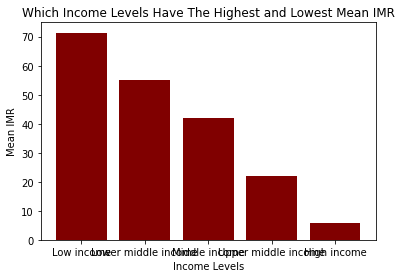

In [ ]:
def visual1():
  data = pd.read_csv("imrdata.csv", delimiter = ",", index_col = 0)
  databyincome = data.iloc[0:5]
  databyincome.sort_values(by = "Mean by Country", ascending = False, inplace = True)
  plt.bar(databyincome["Country"], databyincome['Mean by Country'], color = 'maroon')
  plt.xlabel('Income Levels')
  plt.ylabel('Mean IMR')
  plt.title('Which Income Levels Have The Highest and Lowest Mean IMR')

  plt.show()






############ Function Call ############
visual1()

### Visualization 1 Explanation

The bar graph shows the distribution of mean IMR over the years for each country in its income level. The bar is skewed right, displaying a decrease in IMR as the income level rises. This means that IMR is more prevalent in countries with overall low income.


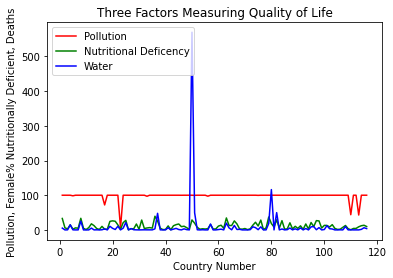

In [ ]:
def visual2():
  new = pd.read_csv("agg_factors.csv", delimiter = ",")
  plt.plot(range(1,117), new['Pollution'], color = 'red', label = 'Pollution')
  plt.plot(range(1,117), new['Female%'], color = 'green', label = 'Nutritional Deficency')
  plt.plot(range(1,117), new['Deaths'], color = 'blue', label = 'Water')
  plt.xlabel('Country Number')
  plt.ylabel('Pollution, Female% Nutritionally Deficient, Deaths')
  plt.title('Three Factors Measuring Quality of Life')
  plt.legend(loc = 'upper left')
  plt.show()





############ Function Call ############
visual2()

### Visualization 2 Explanation

The number of water deaths in thousands and the percent of nutritional deficiency between males and females show spikes in similar places in the graph and therefore make it reasonable to assume that water deaths and nutritional deficiencies can be associated in terms of quality of living. On the other hand, pollution shows a varying display with dips in the data at occasions.  

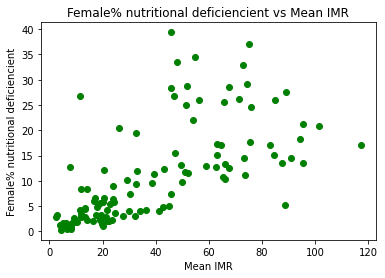

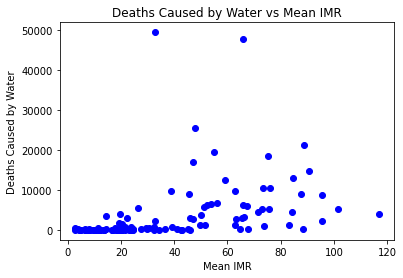

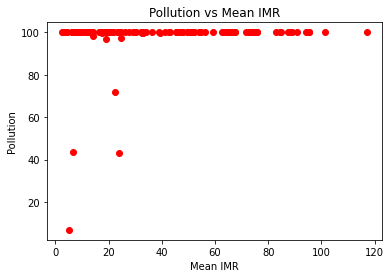

In [ ]:
def visual3():
  all = pd.read_csv("agg_all.csv", delimiter = ",", index_col= 0)
  plt.scatter(all["Mean IMR"], all["Female%"], color = 'green')
  plt.xlabel('Mean IMR')
  plt.ylabel('Female% nutritional deficiencient')
  plt.title('Female% nutritional deficiencient vs Mean IMR')
  plt.show()

  temp = all.drop(["India"], axis=0)
  temp = temp.drop(["Nigeria"], axis = 0)
  temp = temp.drop(["Pakistan"], axis = 0)
  plt.scatter(temp["Mean IMR"], temp["Deaths"], color = 'blue')
  plt.xlabel('Mean IMR')
  plt.ylabel('Deaths Caused by Water')
  plt.title('Deaths Caused by Water vs Mean IMR')
  plt.show()

  plt.scatter(all["Mean IMR"], all["Pollution"], color = 'red')
  plt.xlabel('Mean IMR')
  plt.ylabel('Pollution')
  plt.title('Pollution vs Mean IMR')
  plt.show()









############ Function Call ############
visual3()

### Visualization 3 Explanation

The scatterplot for nutritional deficiencies shows a moderately strong, positive correlation. The deaths caused by water scatterplot has a very moderate positive correlation. The pollution vs mean scatter plot has little to no correlation as all the points are either at the same level or dispersed with no pattern.

## Summary File

In [ ]:
def summary1():
  nddata = pd.read_csv("nddata.csv", delimiter = ",", index_col= 0)
  imrdata = pd.read_csv("imrdata.csv", delimiter = ",", index_col= 0)
  waterdata = pd.read_csv("waterdata.csv", delimiter = ",")
  pollutiondata = pd.read_csv("pollutiondata.csv", delimiter = ",")
  combined = pd.concat([imrdata, nddata, waterdata, pollutiondata])
  combined = combined.groupby("Country").aggregate({"Male%":"sum", "Female%" : "sum", "Deaths" : "sum", "Mean by Country": "sum", "Pollution": "sum"})
  combined  = combined.rename(columns = {"Mean by Country": "Mean IMR"})
  combined = combined.replace(0, np.NaN)
  combined = combined.dropna()
  combined.to_csv("agg_all.csv")





############ Function Call ############
summary1()

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


https://www.congress.gov/bill/117th-congress/house-bill/959
https://www.dispatch.com/story/opinion/columns/guest/2021/12/06/opinion-better-maternal-and-infant-healthcare-lowers-mortality-rates/8850709002/
https://www.whitehouse.gov/build-back-better/




# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


[*  https://www.youtube.com/watch?v=rUd6qfqxqf0&feature=youtu.be

Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
